In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bda-intrusion/NF-CSE-CIC-IDS2018-v2.csv


In [2]:
!pip install pyspark
#/kaggle/input/bda-intrusion/NF-CSE-CIC-IDS2018-v2.csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840629 sha256=5e19fa53d1a45b63d4e0f55d3e5f22ed42fbfce96f271206a7637487aa4edb1f
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [3]:
import pyspark

In [4]:
# import pandas as pd


In [5]:
from pyspark.sql import SparkSession
spark = (
    SparkSession.builder
    .appName('BDA')
    .config("spark.executor.memory", "4g")
    .config("spark.driver.memory", "4g")
    .config("spark.sql.shuffle.partitions", "150")
    .config("spark.default.parallelism", "6")
    .getOrCreate()
)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/03 20:36:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
spark

In [7]:
# #reading the data directly from sparks dataframe
# df = spark.read.csv('/kaggle/input/bda-intrusion/NF-CSE-CIC-IDS2018-v2.csv', header=True, inferSchema=True)

In [8]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, LongType

# defining manual schema because it was taking too long to use inferSchema, that is spark inferring schema for us
schema = StructType([
    StructField("IPV4_SRC_ADDR", StringType(), True),
    StructField("L4_SRC_PORT", IntegerType(), True),
    StructField("IPV4_DST_ADDR", StringType(), True),
    StructField("L4_DST_PORT", IntegerType(), True),
    StructField("PROTOCOL", IntegerType(), True),
    StructField("L7_PROTO", DoubleType(), True),
    StructField("IN_BYTES", IntegerType(), True),
    StructField("IN_PKTS", IntegerType(), True),
    StructField("OUT_BYTES", IntegerType(), True),
    StructField("OUT_PKTS", IntegerType(), True),
    StructField("TCP_FLAGS", IntegerType(), True),
    StructField("CLIENT_TCP_FLAGS", IntegerType(), True),
    StructField("SERVER_TCP_FLAGS", IntegerType(), True),
    StructField("FLOW_DURATION_MILLISECONDS", IntegerType(), True),
    StructField("DURATION_IN", IntegerType(), True),
    StructField("DURATION_OUT", IntegerType(), True),
    StructField("MIN_TTL", IntegerType(), True),
    StructField("MAX_TTL", IntegerType(), True),
    StructField("LONGEST_FLOW_PKT", IntegerType(), True),
    StructField("SHORTEST_FLOW_PKT", IntegerType(), True),
    StructField("MIN_IP_PKT_LEN", IntegerType(), True),
    StructField("MAX_IP_PKT_LEN", IntegerType(), True),
    StructField("SRC_TO_DST_SECOND_BYTES", DoubleType(), True),
    StructField("DST_TO_SRC_SECOND_BYTES", DoubleType(), True),
    StructField("RETRANSMITTED_IN_BYTES", IntegerType(), True),
    StructField("RETRANSMITTED_IN_PKTS", IntegerType(), True),
    StructField("RETRANSMITTED_OUT_BYTES", IntegerType(), True),
    StructField("RETRANSMITTED_OUT_PKTS", IntegerType(), True),
    StructField("SRC_TO_DST_AVG_THROUGHPUT", LongType(), True),
    StructField("DST_TO_SRC_AVG_THROUGHPUT", LongType(), True),
    StructField("NUM_PKTS_UP_TO_128_BYTES", IntegerType(), True),
    StructField("NUM_PKTS_128_TO_256_BYTES", IntegerType(), True),
    StructField("NUM_PKTS_256_TO_512_BYTES", IntegerType(), True),
    StructField("NUM_PKTS_512_TO_1024_BYTES", IntegerType(), True),
    StructField("NUM_PKTS_1024_TO_1514_BYTES", IntegerType(), True),
    StructField("TCP_WIN_MAX_IN", IntegerType(), True),
    StructField("TCP_WIN_MAX_OUT", IntegerType(), True),
    StructField("ICMP_TYPE", IntegerType(), True),
    StructField("ICMP_IPV4_TYPE", IntegerType(), True),
    StructField("DNS_QUERY_ID", IntegerType(), True),
    StructField("DNS_QUERY_TYPE", IntegerType(), True),
    StructField("DNS_TTL_ANSWER", IntegerType(), True),
    StructField("FTP_COMMAND_RET_CODE", IntegerType(), True),
    StructField("Label", IntegerType(), True),
    StructField("Attack", StringType(), True)
])

print("done!")


done!


In [9]:
df = spark.read.csv('/kaggle/input/bda-intrusion/NF-CSE-CIC-IDS2018-v2.csv', header=True, schema=schema)
print("done")

done


In [10]:
#Using vertical because normal show was not showing all columns it was truncating them on their own
df.show(n=2, truncate=False, vertical=True)

24/12/03 20:36:11 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0--------------------------------------
 IPV4_SRC_ADDR               | 13.58.98.64     
 L4_SRC_PORT                 | 40894           
 IPV4_DST_ADDR               | 172.31.69.25    
 L4_DST_PORT                 | 22              
 PROTOCOL                    | 6               
 L7_PROTO                    | 92.0            
 IN_BYTES                    | 3164            
 IN_PKTS                     | 23              
 OUT_BYTES                   | 3765            
 OUT_PKTS                    | 21              
 TCP_FLAGS                   | 27              
 CLIENT_TCP_FLAGS            | 27              
 SERVER_TCP_FLAGS            | 27              
 FLOW_DURATION_MILLISECONDS  | 0               
 DURATION_IN                 | 0               
 DURATION_OUT                | 0               
 MIN_TTL                     | 63              
 MAX_TTL                     | 63              
 LONGEST_FLOW_PKT            | 1028            
 SHORTEST_FLOW_PKT           | 52       

In [11]:
df.printSchema()

root
 |-- IPV4_SRC_ADDR: string (nullable = true)
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- IPV4_DST_ADDR: string (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO

In [12]:
df.select('Attack').distinct().collect()

[Row(Attack='Brute Force -XSS'),
 Row(Attack='DoS attacks-Slowloris'),
 Row(Attack='Benign'),
 Row(Attack='DDoS attacks-LOIC-HTTP'),
 Row(Attack='DoS attacks-Hulk'),
 Row(Attack='SSH-Bruteforce'),
 Row(Attack='DDOS attack-HOIC'),
 Row(Attack='Bot'),
 Row(Attack='Brute Force -Web'),
 Row(Attack='FTP-BruteForce'),
 Row(Attack='DDOS attack-LOIC-UDP'),
 Row(Attack='Infilteration'),
 Row(Attack='DoS attacks-SlowHTTPTest'),
 Row(Attack='DoS attacks-GoldenEye'),
 Row(Attack='SQL Injection')]

In [13]:
#i wanted to check if there is a seperate class for situations where label is 0 (there is no attack)
#since we have a seperate class for it as well , instead of doing binary classification , we can directly do 
# multi class analysis to also be able to predict the type of attack.

benign_row = df.filter(df["Label"] == 0).limit(1).select('Attack')

benign_row.show()

+------+
|Attack|
+------+
|Benign|
+------+



In [14]:
#Since it is taking so long to preprocess the dataset, we will try to do sampling. I chose to do stratification sampling
# Since the distribution of classes is quite varying , so that the sampling is balanced we choose that.
df.groupBy("Attack").count().show()

#So for that step 1 - To find the distribution of each class in the attack column. 

+--------------------+--------+
|              Attack|   count|
+--------------------+--------+
|    Brute Force -XSS|     927|
|DoS attacks-Slowl...|    9512|
|              Benign|16635567|
|DDoS attacks-LOIC...|  307300|
|    DoS attacks-Hulk|  432648|
|      SSH-Bruteforce|   94979|
|    DDOS attack-HOIC| 1080858|
|                 Bot|  143097|
|    Brute Force -Web|    2143|
|      FTP-BruteForce|   25933|
|DDOS attack-LOIC-UDP|    2112|
|       Infilteration|  116361|
|DoS attacks-SlowH...|   14116|
|DoS attacks-Golde...|   27723|
|       SQL Injection|     432|
+--------------------+--------+



In [15]:
#After finding out the distribution, we have to assign certain fractions to each class, for eg if there is like greater
#than a million rows in a class, we want to sample only 10% of the class, or if there are only like 1000
#rows, we want to sample 100% of that class.

fractions = {
    "SSH-Bruteforce": 0.2,
    "Infilteration": 0.1,
    "SQL Injection": 1.0,
    "DoS attacks-Slowloris": 1.0,
    "Benign": 0.001,
    "DoS attacks-SlowHTTPTest": 0.4,
    "Bot": 0.1,
    "DoS attacks-GoldenEye": 0.3,
    "Brute Force -XSS": 1.0,
    "FTP-BruteForce": 0.3,
    "DDOS attack-LOIC-UDP": 1.0,
    "DoS attacks-Hulk": 0.01,
    "Brute Force -Web": 1.0,
    "DDOS attack-HOIC": 0.005,
    "DDoS attacks-LOIC-HTTP": 0.01,
}

In [16]:
#Now we perform the sampling of our dataset, with the defined fractions
sampled_df = df.sampleBy("Attack", fractions, seed=42)

sampled_df.groupBy("Attack").count().show()

+--------------------+-----+
|              Attack|count|
+--------------------+-----+
|    Brute Force -XSS|  927|
|DoS attacks-Slowl...| 9512|
|DDoS attacks-LOIC...| 3081|
|              Benign|16703|
|    DoS attacks-Hulk| 4377|
|      SSH-Bruteforce|19217|
|    DDOS attack-HOIC| 5368|
|                 Bot|14300|
|    Brute Force -Web| 2143|
|      FTP-BruteForce| 7647|
|DDOS attack-LOIC-UDP| 2112|
|       Infilteration|11548|
|DoS attacks-SlowH...| 5637|
|DoS attacks-Golde...| 8267|
|       SQL Injection|  432|
+--------------------+-----+



In [17]:
sampled_df.describe().show(truncate=False)
#the result is coming in very bad format

+-------+-------------+-----------------+-------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+--------------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+----------------------+-------------------------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+---------------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+--------------+
|summary|IPV4_SRC_ADDR|L4_SRC_PORT      |IPV4_DST_ADDR|L4_DST_PORT      

In [18]:
# pip install prettytable


In [19]:
summary_df = sampled_df.describe()

# converting the summary DataFrame to a Pandas DataFrame
summary_df_pandas = summary_df.toPandas()


print(summary_df_pandas)

  summary IPV4_SRC_ADDR        L4_SRC_PORT  IPV4_DST_ADDR        L4_DST_PORT  \
0   count        111271             111271         111271             111271   
1    mean          None    50987.720457262           None   1511.68112985414   
2  stddev          None  9339.406365546227           None  3884.296660576246   
3     min       0.0.0.0                  0        0.0.0.0                  0   
4     max  98.29.31.229              65535  98.139.225.35              65389   

            PROTOCOL           L7_PROTO            IN_BYTES  \
0             111271             111271              111271   
1  7.684553926899192  38.29078345660636  113635.11790133997   
2  3.969029291750768  50.47800940790578   829871.1942773578   
3                  1                0.0                  28   
4                 58              245.0            17536140   

              IN_PKTS          OUT_BYTES  ...      TCP_WIN_MAX_IN  \
0              111271             111271  ...              111271   
1 

In [20]:
# # print(type(cleaned_df))
# # had to remove NaN values
# cleaned_df = sampled_df.dropna()

# cleaned_df.show()


In [21]:
# print(f"Shape of cleaned_df: ({cleaned_df.count()}, {len(cleaned_df.columns)})")

# #After sampling, cleaning the NaN values we get the shape of (419335,45)

In [22]:
#Now after cleaning the data, we want to handle missing values, but instead of removing the NaN values, or 
#manually calculating mean medians and replacing them, we can use the imputer class from spark ml feature
#But first we need to identify which columns do have missing/null values
from pyspark.sql.functions import col, isnan, when, count

missing_values = sampled_df.select([
    count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in sampled_df.columns
])

missing_columns = [
    col_name for col_name, count_value in missing_values.collect()[0].asDict().items() if count_value > 0
]

print("Columns with missing values:", missing_columns)


Columns with missing values: []


In [23]:
print(f"Shape of cleaned df: ({sampled_df.count()}, {len(sampled_df.columns)})")

Shape of cleaned df: (111271, 45)


In [24]:
#Now after cleaning the data, we want to handle missing values, but instead of removing the NaN values, or 
#manually calculating mean medians and replacing them, we can use the imputer class from spark ml feature
#But first we need to identify which columns do have missing/null values
from pyspark.sql.functions import col, isnan, when, count

missing_values = df.select([
    count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df.columns
])

missing_columns = [
    col_name for col_name, count_value in missing_values.collect()[0].asDict().items() if count_value > 0
]

print("Columns with missing values:", missing_columns)

#No missing values, and just to confirm that the missing values havent been removed due to sampling, I checked 
#the orignal dataset, and there are no missing values in that either

Columns with missing values: []


In [25]:
# Now we want to one hot encode our 'Attack' column for our multi-class classification

from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

attack_indexer = StringIndexer(inputCol="Attack", outputCol="attack_index").fit(sampled_df)

# one-hot encoding the attack index
attack_encoder = OneHotEncoder(inputCol="attack_index", outputCol="attack_encoded")

# here I am saving the orignal strings/attack labels with their corresponding numerical representation,
#so that when I predict a class for it, it also gives the name of attack.
attack_mapping = attack_indexer.labels

# applying the transformation using a pipeline. Here we can directly add fit and transform without the 
# need of applying these seperately, shortens the code
pipeline = Pipeline(stages=[attack_indexer, attack_encoder])
encoded_df = pipeline.fit(sampled_df).transform(sampled_df)

encoded_df.select("Attack", "attack_index", "attack_encoded").show(5)

print("Mapping of attack labels to indices:")
for idx, label in enumerate(attack_mapping):
    print(f"{idx}: {label}")



+--------------------+------------+---------------+
|              Attack|attack_index| attack_encoded|
+--------------------+------------+---------------+
|DoS attacks-Slowl...|         4.0| (14,[4],[1.0])|
|    DoS attacks-Hulk|         9.0| (14,[9],[1.0])|
|       Infilteration|         3.0| (14,[3],[1.0])|
|    Brute Force -Web|        11.0|(14,[11],[1.0])|
|      SSH-Bruteforce|         0.0| (14,[0],[1.0])|
+--------------------+------------+---------------+
only showing top 5 rows

Mapping of attack labels to indices:
0: SSH-Bruteforce
1: Benign
2: Bot
3: Infilteration
4: DoS attacks-Slowloris
5: DoS attacks-GoldenEye
6: FTP-BruteForce
7: DoS attacks-SlowHTTPTest
8: DDOS attack-HOIC
9: DoS attacks-Hulk
10: DDoS attacks-LOIC-HTTP
11: Brute Force -Web
12: DDOS attack-LOIC-UDP
13: Brute Force -XSS
14: SQL Injection


In [26]:
#Now the biggest challenge is the use of Ip-address-src column and IP-address-dest columns, they are orignally
#string columns, so we cant use them directly in a model without one hot encoding
#But we cant one hot encode them because doing so will create more than atleast a 100k unique values,
#which will terribly overfit the model.
#Upon researching got to know, we can reduce these addresses to their country information using 
#  ipinfo.io API

In [27]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [28]:
distinct_src_region_count = sampled_df.select("IPV4_SRC_ADDR").distinct().count()
print(distinct_src_region_count)
#Earlier with initial sampling values the number of unique values were 14000

2758


In [29]:
distinct_src_ip_count = encoded_df.select("IPV4_SRC_ADDR").distinct().count()
print(f"Distinct source IP count: {distinct_src_ip_count}")

Distinct source IP count: 2758


In [30]:
#initial shape of encoded_df
num_rows = encoded_df.count()
num_columns = len(encoded_df.columns)
print(f"Shape of the dataset: {num_rows} rows, {num_columns} columns")


Shape of the dataset: 111271 rows, 47 columns


In [31]:
from pyspark.sql.types import NumericType
from pyspark.sql import functions as F

# filteringt only numeric columns
numeric_columns = [col for col, dtype in encoded_df.dtypes if isinstance(dtype, NumericType)]

def remove_outliers(df, column_name):
    q1, q3 = df.approxQuantile(column_name, [0.25, 0.75], 0.05)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return df.filter((F.col(column_name) >= lower_bound) & (F.col(column_name) <= upper_bound))

# Apply outlier removal for each numeric column
for column in numeric_columns:
    encoded_df = remove_outliers(encoded_df, column)

encoded_df.show()


+--------------+-----------+--------------+-----------+--------+--------+--------+-------+---------+--------+---------+----------------+----------------+--------------------------+-----------+------------+-------+-------+----------------+-----------------+--------------+--------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+----------------------+-------------------------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+---------------------------+--------------+---------------+---------+--------------+------------+--------------+--------------+--------------------+-----+--------------------+------------+---------------+
| IPV4_SRC_ADDR|L4_SRC_PORT| IPV4_DST_ADDR|L4_DST_PORT|PROTOCOL|L7_PROTO|IN_BYTES|IN_PKTS|OUT_BYTES|OUT_PKTS|TCP_FLAGS|CLIENT_TCP_FLAGS|SERVER_TCP_FLAGS|FLOW_DURATION_MILLISECONDS|DURATION_IN|DURATION_OUT|MIN_TTL|

In [32]:
#after shape of encoded_df
num_rows = encoded_df.count()
num_columns = len(encoded_df.columns)
print(f"Shape of the dataset: {num_rows} rows, {num_columns} columns")


Shape of the dataset: 111271 rows, 47 columns


In [33]:
import requests

def get_geolocation(ip):
    # making an API request to geojs.io for geo data
    try:
        response = requests.get(f'https://get.geojs.io/v1/ip/geo/{ip}.json')
        data = response.json()
        # this will return the country, region, and city from the response
        return data.get('country', 1), data.get('region', None), data.get('city', None)
    except Exception as e:
        print(f"Error fetching geolocation for {ip}: {e}")
        return e

ip_address = "18.218.229.235"
country, region, city = get_geolocation(ip_address)
print(f"Country: {country}, Region: {region}, City: {city}")

#Here for some ip addresses like for eg 172.31.69.12, the country, region, and city is coming as None
#So obviously those are not valid IP addresses/ or maybe the data information for those IP addresses 
#is not available.
#So we have 2 options either to remove those rows entirely, or replace those values with 'Unkown'


Country: United States, Region: Ohio, City: Columbus


In [34]:
# processed_df.cache() #if previous operations are interferring with your current operations, like the geo
# #thing was intereferring with my other operations

In [35]:
import requests
from pyspark.sql.functions import udf, col
import pyspark.sql.functions as F
from pyspark.sql.types import StringType

def get_region(ip):
    try:
        # Using the new endpoint for geo data
        response = requests.get(f'https://get.geojs.io/v1/ip/geo/{ip}.json')
        data = response.json()
        
        # Extract and return the region from the response
        return data.get('region', None)
    except Exception as e:
        print(f"Error fetching geolocation for {ip}: {e}")
        return None

get_region_udf = udf(get_region, StringType())

processed_df = (
    encoded_df
    .withColumn("IPV4_SRC_ADDR_region", get_region_udf(col("IPV4_SRC_ADDR")))
    .withColumn("IPV4_DST_ADDR_region", get_region_udf(col("IPV4_DST_ADDR")))
)

# replacing 'none' values with 'Unknown'
processed_df = (
    processed_df
    .withColumn("IPV4_SRC_ADDR_region", 
                F.coalesce(col("IPV4_SRC_ADDR_region"), F.lit("Unknown")))
    .withColumn("IPV4_DST_ADDR_region", 
                F.coalesce(col("IPV4_DST_ADDR_region"), F.lit("Unknown")))
)

processed_df.select("IPV4_SRC_ADDR", "IPV4_SRC_ADDR_region", "IPV4_DST_ADDR", "IPV4_DST_ADDR_region").show(10)


processed_df_copy = processed_df



+-------------+--------------------+--------------+--------------------+
|IPV4_SRC_ADDR|IPV4_SRC_ADDR_region| IPV4_DST_ADDR|IPV4_DST_ADDR_region|
+-------------+--------------------+--------------+--------------------+
|18.217.165.70|                Ohio|  172.31.69.25|             Unknown|
|18.219.193.20|                Ohio|  172.31.69.25|             Unknown|
| 172.31.69.13|             Unknown|  172.31.69.21|             Unknown|
|18.218.115.60|                Ohio|  172.31.69.28|             Unknown|
|  13.58.98.64|                Ohio|  172.31.69.25|             Unknown|
|18.217.165.70|                Ohio|  172.31.69.25|             Unknown|
| 13.59.126.31|                Ohio|  172.31.69.25|             Unknown|
| 172.31.69.10|             Unknown|18.219.211.138|                Ohio|
|  13.58.98.64|                Ohio|  172.31.69.25|             Unknown|
|18.217.165.70|                Ohio|  172.31.69.25|             Unknown|
+-------------+--------------------+--------------+

In [36]:
# shape of processed_df
num_rows = processed_df.count()
num_columns = len(processed_df.columns)
print(f"Shape of the dataset: {num_rows} rows, {num_columns} columns")


Shape of the dataset: 111271 rows, 49 columns


In [37]:
processed_df.cache()
#the operations for distinct() is very very time consuming, hence to make it faster we can cache our
#data for faster operations


DataFrame[IPV4_SRC_ADDR: string, L4_SRC_PORT: int, IPV4_DST_ADDR: string, L4_DST_PORT: int, PROTOCOL: int, L7_PROTO: double, IN_BYTES: int, IN_PKTS: int, OUT_BYTES: int, OUT_PKTS: int, TCP_FLAGS: int, CLIENT_TCP_FLAGS: int, SERVER_TCP_FLAGS: int, FLOW_DURATION_MILLISECONDS: int, DURATION_IN: int, DURATION_OUT: int, MIN_TTL: int, MAX_TTL: int, LONGEST_FLOW_PKT: int, SHORTEST_FLOW_PKT: int, MIN_IP_PKT_LEN: int, MAX_IP_PKT_LEN: int, SRC_TO_DST_SECOND_BYTES: double, DST_TO_SRC_SECOND_BYTES: double, RETRANSMITTED_IN_BYTES: int, RETRANSMITTED_IN_PKTS: int, RETRANSMITTED_OUT_BYTES: int, RETRANSMITTED_OUT_PKTS: int, SRC_TO_DST_AVG_THROUGHPUT: bigint, DST_TO_SRC_AVG_THROUGHPUT: bigint, NUM_PKTS_UP_TO_128_BYTES: int, NUM_PKTS_128_TO_256_BYTES: int, NUM_PKTS_256_TO_512_BYTES: int, NUM_PKTS_512_TO_1024_BYTES: int, NUM_PKTS_1024_TO_1514_BYTES: int, TCP_WIN_MAX_IN: int, TCP_WIN_MAX_OUT: int, ICMP_TYPE: int, ICMP_IPV4_TYPE: int, DNS_QUERY_ID: int, DNS_QUERY_TYPE: int, DNS_TTL_ANSWER: int, FTP_COMMAND

In [38]:
# #filtering out where we get 'unknown' values aka the ip address couldnt be used to find out the region
# #But if I try to remove rows where either one of them is unknown, it literally removed all the rows.

# # processed_df = processed_df.filter(
# #     (F.col("IPV4_SRC_ADDR_region") != "Unknown") &
# #     (F.col("IPV4_DST_ADDR_region") != "Unknown")
# # )

# #So the only option is to put OR condition// to retain atleast the partial data

# processed_df = processed_df.filter(
#     (F.col("IPV4_SRC_ADDR_region") != "Unknown") | 
#     (F.col("IPV4_DST_ADDR_region") != "Unknown")
# )


# processed_df.select("IPV4_SRC_ADDR", "IPV4_SRC_ADDR_region", 
#                     "IPV4_DST_ADDR", "IPV4_DST_ADDR_region").show(10)

#But later we realised, that the value unkown is also important to the data, as it can be inferred that 
#it means  the ip address could be private 


In [39]:
# #after shape of processed_df
# num_rows = processed_df.count()
# num_columns = len(processed_df.columns)
# print(f"Shape of the dataset: {num_rows} rows, {num_columns} columns")

In [40]:
# from pyspark.sql import SparkSession

# # get the SparkContext from the SparkSession
# spark_context = SparkSession.builder.getOrCreate().sparkContext

# # get the number of cores available to Spark
# num_cores = spark_context.defaultParallelism
# print(f"Number of cores available to Spark: {num_cores}")


In [41]:
# # check the number of partitions in the DataFrame, since the count() is a lazy operation that is it takes long 
# #time on large datasedts and counts every row. So was suggested to see if youre partitions are enough

# num_partitions = processed_df.rdd.getNumPartitions()
# print(f"Number of partitions in processed_df: {num_partitions}")


In [42]:
# processed_df.count()

In [43]:
# #Now lets see if there are still too many unique values in the transformed/newly formed ip-address-region
# #columns

# #in the 'IPV4_SRC_ADDR_region' column
# distinct_src_region_count = processed_df.select("IPV4_SRC_ADDR_region").distinct().count()

# #in the 'IPV4_DST_ADDR_region' column
# distinct_dst_region_count = processed_df.select("IPV4_DST_ADDR_region").distinct().count()

# print(f"Number of unique values in 'IPV4_SRC_ADDR_region': {distinct_src_region_count}")
# print(f"Number of unique values in 'IPV4_DST_ADDR_region': {distinct_dst_region_count}")

# The operations were taking too long, so instead of using distinct, we tried to use approx_count which is
#more efficient

from pyspark.sql.functions import approx_count_distinct

distinct_src_region_count = processed_df.select(approx_count_distinct("IPV4_SRC_ADDR_region")).collect()[0][0]
distinct_dst_region_count = processed_df.select(approx_count_distinct("IPV4_DST_ADDR_region")).collect()[0][0]

print(f"Approx. number of unique values in 'IPV4_SRC_ADDR_region': {distinct_src_region_count}")
print(f"Approx. number of unique values in 'IPV4_DST_ADDR_region': {distinct_dst_region_count}")

#Ok we were able to succesfully reduce 14000 unique values to approx 400 unique values for src addr, and 
#for dest we were able to reduce those values to 50.
#Now we can do label encoding on both of them to finally convert them into numerical values.

Approx. number of unique values in 'IPV4_SRC_ADDR_region': 419
Approx. number of unique values in 'IPV4_DST_ADDR_region': 50


In [44]:
# Dropping the IPV4_DST_ADDR and IPV4_SRC_ADDR columns
processed_df = processed_df.drop("IPV4_DST_ADDR", "IPV4_SRC_ADDR")

# Display the result
processed_df.show(20, truncate=False)


+-----------+-----------+--------+--------+--------+-------+---------+--------+---------+----------------+----------------+--------------------------+-----------+------------+-------+-------+----------------+-----------------+--------------+--------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+----------------------+-------------------------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+---------------------------+--------------+---------------+---------+--------------+------------+--------------+--------------+--------------------+-----+------------------------+------------+---------------+--------------------+--------------------+
|L4_SRC_PORT|L4_DST_PORT|PROTOCOL|L7_PROTO|IN_BYTES|IN_PKTS|OUT_BYTES|OUT_PKTS|TCP_FLAGS|CLIENT_TCP_FLAGS|SERVER_TCP_FLAGS|FLOW_DURATION_MILLISECONDS|DURATION_IN|DURATION_OUT|MIN_TTL|MAX_TTL|LONGES

In [45]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Define categorical columns
categorical_columns = ["IPV4_SRC_ADDR_region", "IPV4_DST_ADDR_region"]
encoded_columns = ["IPV4_SRC_ADDR", "IPV4_DST_ADDR"]  # New column names after encoding

# Create transformers for StringIndexer and OneHotEncoder
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_columns]
encoders = [
    OneHotEncoder(inputCol=f"{col}_index", outputCol=new_col)
    for col, new_col in zip(categorical_columns, encoded_columns)
]

# Combine transformers into a pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
processed_df = pipeline.fit(processed_df).transform(processed_df)

# Drop original region columns and index columns
columns_to_drop = categorical_columns + [f"{col}_index" for col in categorical_columns]
processed_df = processed_df.drop(*columns_to_drop)

# Show results
processed_df.show(truncate=False)


+-----------+-----------+--------+--------+--------+-------+---------+--------+---------+----------------+----------------+--------------------------+-----------+------------+-------+-------+----------------+-----------------+--------------+--------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+----------------------+-------------------------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+---------------------------+--------------+---------------+---------+--------------+------------+--------------+--------------+--------------------+-----+------------------------+------------+---------------+---------------+--------------+
|L4_SRC_PORT|L4_DST_PORT|PROTOCOL|L7_PROTO|IN_BYTES|IN_PKTS|OUT_BYTES|OUT_PKTS|TCP_FLAGS|CLIENT_TCP_FLAGS|SERVER_TCP_FLAGS|FLOW_DURATION_MILLISECONDS|DURATION_IN|DURATION_OUT|MIN_TTL|MAX_TTL|LONGEST_FLOW_PKT|

In [46]:
processed_df.printSchema()


root
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO_DST_SECOND_BYTES: double (nullable = true)
 |-- DST_TO_SRC_SECOND_BYTES: double (nullable

In [47]:
# from pyspark.sql import functions as F

# # Create a new DataFrame by removing the string columns
# processed_df = processed_df.drop("IPV4_SRC_ADDR_region", "IPV4_DST_ADDR_region")

# # # Rename the index columns to the desired names
# # new_df = (
# #     new_df.withColumnRenamed("IPV4_SRC_ADDR_region_index", "IPV4_SRC_ADDR")
# #           .withColumnRenamed("IPV4_DST_ADDR_region_index", "IPV4_DST_ADDR")
# # )

# # Show the schema of the updated DataFrame
# processed_df.printSchema()

# # Preview the updated DataFrame
# processed_df.show(10, truncate=False)


In [48]:
# Select the desired columns and show their values
processed_df.select("Attack", "attack_index", "attack_encoded").show(20, truncate=False)


+------------------------+------------+---------------+
|Attack                  |attack_index|attack_encoded |
+------------------------+------------+---------------+
|DoS attacks-Slowloris   |4.0         |(14,[4],[1.0]) |
|DoS attacks-Hulk        |9.0         |(14,[9],[1.0]) |
|Infilteration           |3.0         |(14,[3],[1.0]) |
|Brute Force -Web        |11.0        |(14,[11],[1.0])|
|SSH-Bruteforce          |0.0         |(14,[0],[1.0]) |
|DoS attacks-Slowloris   |4.0         |(14,[4],[1.0]) |
|DoS attacks-SlowHTTPTest|7.0         |(14,[7],[1.0]) |
|Bot                     |2.0         |(14,[2],[1.0]) |
|SSH-Bruteforce          |0.0         |(14,[0],[1.0]) |
|DoS attacks-Slowloris   |4.0         |(14,[4],[1.0]) |
|DDoS attacks-LOIC-HTTP  |10.0        |(14,[10],[1.0])|
|Bot                     |2.0         |(14,[2],[1.0]) |
|DoS attacks-SlowHTTPTest|7.0         |(14,[7],[1.0]) |
|Infilteration           |3.0         |(14,[3],[1.0]) |
|DoS attacks-Slowloris   |4.0         |(14,[4],[

In [49]:
processed_df = processed_df.drop("attack_index")


In [50]:
processed_df.printSchema()


root
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO_DST_SECOND_BYTES: double (nullable = true)
 |-- DST_TO_SRC_SECOND_BYTES: double (nullable

In [51]:
processed_df = processed_df.dropna()


In [52]:
numeric_columns = [col for col in processed_df.columns if col != 'Attack']
print(len(numeric_columns))  # This should match the number of rows/columns in your correlation matrix


45


Columns to be included in correlation matrix: ['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label']


24/12/03 21:41:13 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/12/03 21:41:14 WARN PearsonCorrelation: Pearson correlation matrix contains NaN values.


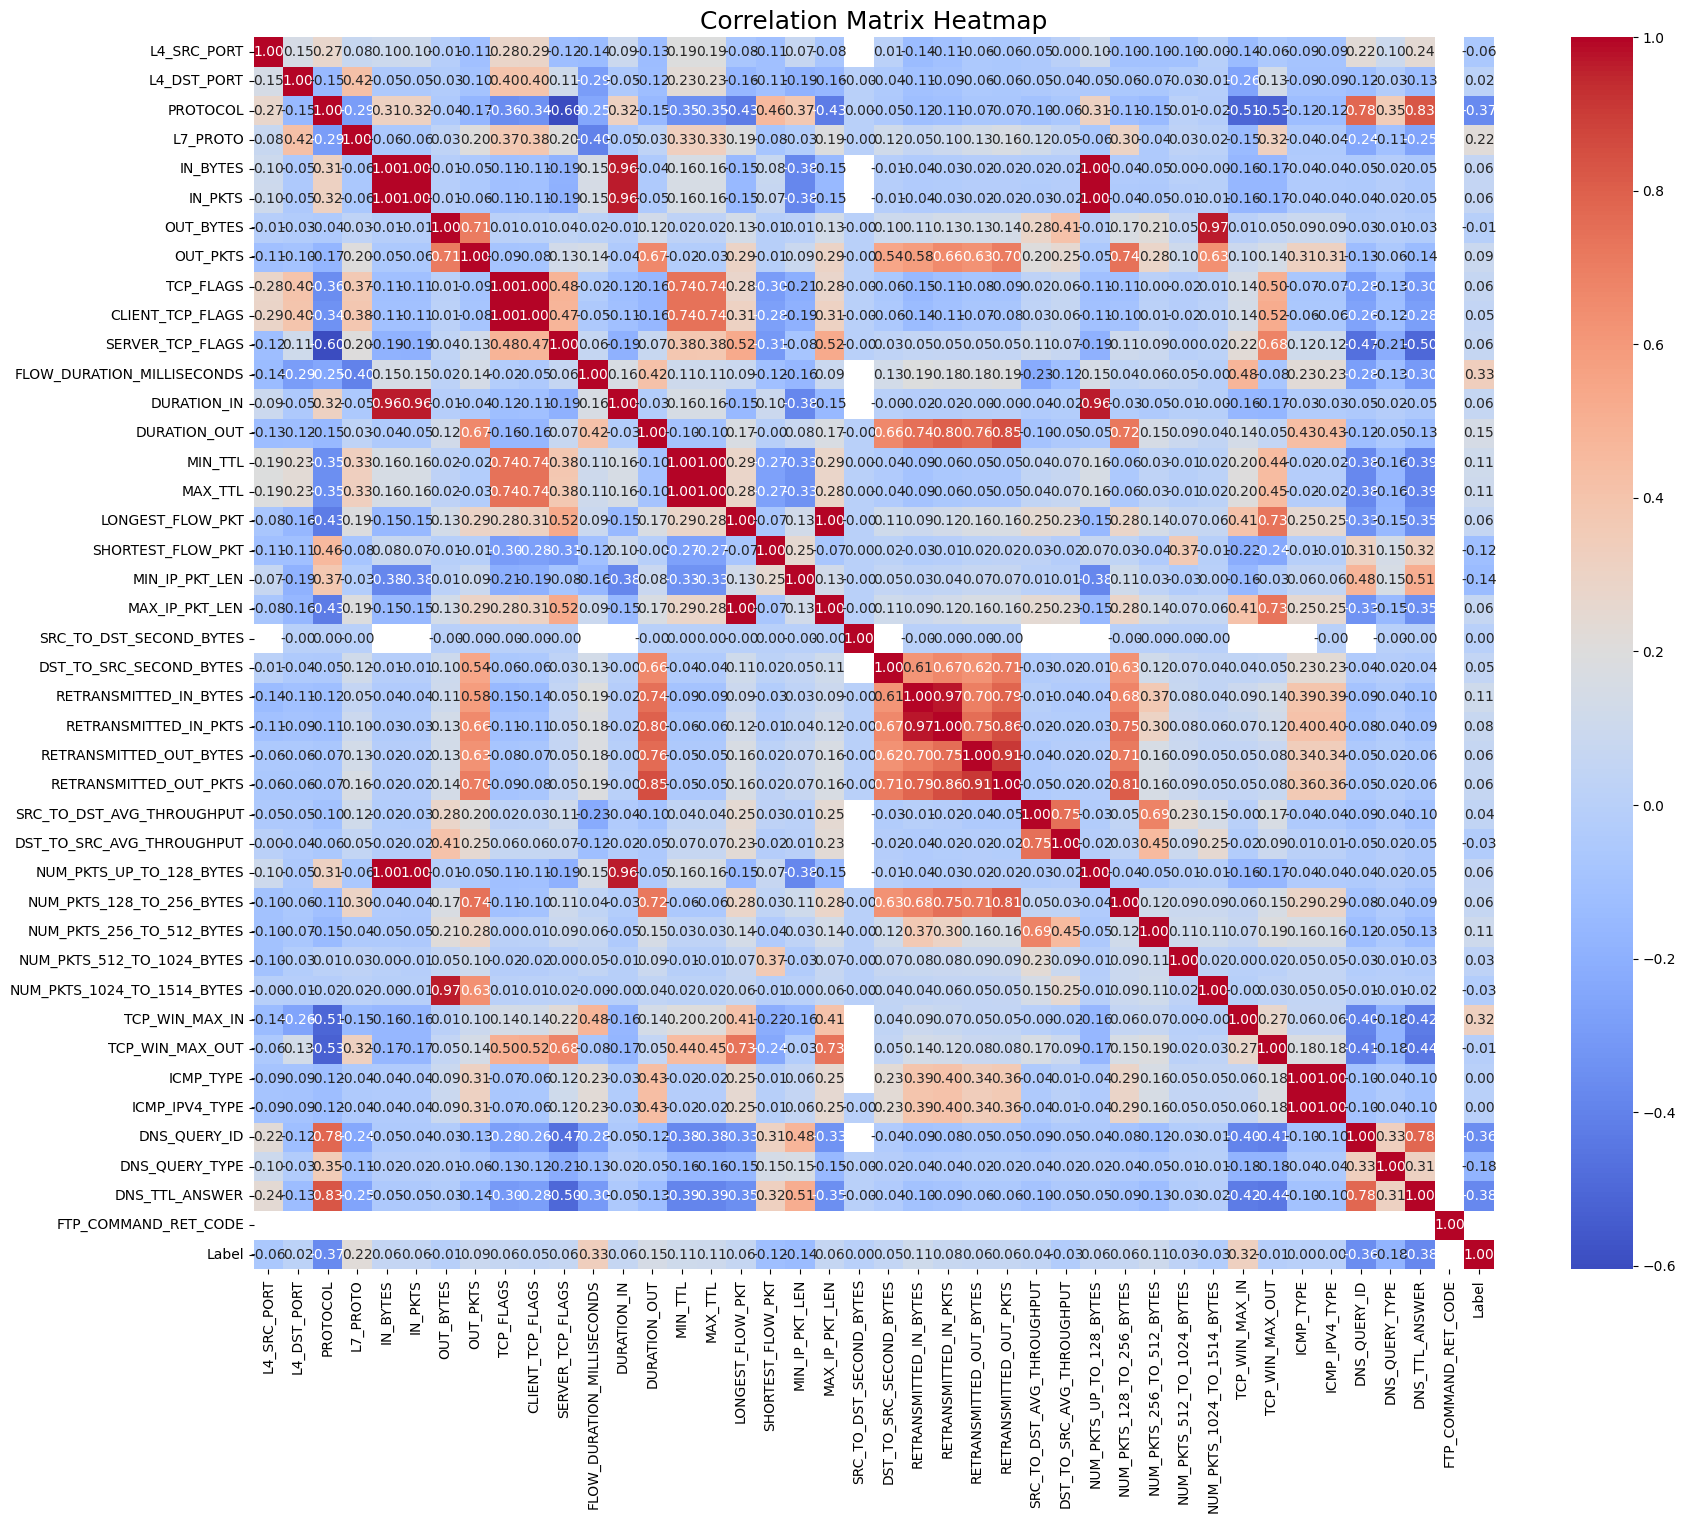

In [53]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# exclude 'Attack', 'attack_encoded', 'IPV4_SRC_ADDR', and 'IPV4_DST_ADDR' because
#for attack since its a feature we want to predict/dependent variable, we cant include that here
#as it can include bias. And the other 2 columns are one hot encoded and can generate around 450 more columns
#which wont be expressed well in the matrix
numeric_columns = [col for col in processed_df.columns if col not in ['Attack', 'attack_encoded', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR']]

print("Columns to be included in correlation matrix:", numeric_columns)



vector_col = "features"
assembler = VectorAssembler(inputCols=numeric_columns, outputCol=vector_col)
vector_df = assembler.transform(processed_df).select(vector_col)

correlation_matrix = Correlation.corr(vector_df, vector_col).head()[0].toArray()

corr_df = pd.DataFrame(correlation_matrix, columns=numeric_columns, index=numeric_columns)

# Plotting the heatmap with correlation values
plt.figure(figsize=(20, 16))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()


In [54]:
import numpy as np

#Since it is difficult to manually interpret the correlation matrix, lets set a threshold, above which we might
#remove one of the 2 columns to prevent multicollinearity

threshold = 0.8

upper_triangle = np.triu(corr_df, k=1)

high_corr_indices = np.where(np.abs(upper_triangle) > threshold)

high_corr_pairs = [(corr_df.index[i], corr_df.columns[j], corr_df.iloc[i, j])
                   for i, j in zip(*high_corr_indices)]


if high_corr_pairs:
    print(f"Pairs of features with correlation above {threshold}:\n")
    for feature1, feature2, corr_value in high_corr_pairs:
        print(f"{feature1} and {feature2}: Correlation = {corr_value:.2f}")
else:
    print(f"No pairs of features with correlation above {threshold}.")


Pairs of features with correlation above 0.8:

PROTOCOL and DNS_TTL_ANSWER: Correlation = 0.83
IN_BYTES and IN_PKTS: Correlation = 1.00
IN_BYTES and DURATION_IN: Correlation = 0.96
IN_BYTES and NUM_PKTS_UP_TO_128_BYTES: Correlation = 1.00
IN_PKTS and DURATION_IN: Correlation = 0.96
IN_PKTS and NUM_PKTS_UP_TO_128_BYTES: Correlation = 1.00
OUT_BYTES and NUM_PKTS_1024_TO_1514_BYTES: Correlation = 0.97
TCP_FLAGS and CLIENT_TCP_FLAGS: Correlation = 1.00
DURATION_IN and NUM_PKTS_UP_TO_128_BYTES: Correlation = 0.96
DURATION_OUT and RETRANSMITTED_OUT_PKTS: Correlation = 0.85
MIN_TTL and MAX_TTL: Correlation = 1.00
LONGEST_FLOW_PKT and MAX_IP_PKT_LEN: Correlation = 1.00
RETRANSMITTED_IN_BYTES and RETRANSMITTED_IN_PKTS: Correlation = 0.97
RETRANSMITTED_IN_PKTS and RETRANSMITTED_OUT_PKTS: Correlation = 0.86
RETRANSMITTED_OUT_BYTES and RETRANSMITTED_OUT_PKTS: Correlation = 0.91
RETRANSMITTED_OUT_PKTS and NUM_PKTS_128_TO_256_BYTES: Correlation = 0.81
ICMP_TYPE and ICMP_IPV4_TYPE: Correlation = 1.00

In [55]:
#Lets start with all pairs who have correlation of 1
# 1

selected_columns = ['IN_BYTES', 'NUM_PKTS_UP_TO_128_BYTES']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#Here it can be interpreted that, inbytes is the total volumne of inbound traffic/number of bytes received
#But the numpackets, is the number of packets with volume upto 128 bytes not greater
#It seems like the second column could be a subset of the first one
#Since they both have correlation of 1, it would be good if we remove the second column

+--------+------------------------+
|IN_BYTES|NUM_PKTS_UP_TO_128_BYTES|
+--------+------------------------+
|3326    |7                       |
|2985    |33                      |
|44      |2                       |
|511     |8                       |
|3200    |36                      |
|180     |3                       |
|420     |14                      |
|497     |8                       |
|3064    |32                      |
|180     |3                       |
|232     |8                       |
|538     |8                       |
|480     |16                      |
|72      |2                       |
|3266    |6                       |
|538     |8                       |
|3326    |7                       |
|538     |8                       |
|538     |8                       |
|1536    |14                      |
+--------+------------------------+
only showing top 20 rows



In [56]:
#Lets start with all pairs who have correlation of 1
# 1

selected_columns = ['IN_BYTES', 'IN_PKTS']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#The correlation of 1 between them indicates that the packet size must be considered to be constant 
#lets see by calculating the packet size for first few rows


+--------+-------+
|IN_BYTES|IN_PKTS|
+--------+-------+
|3326    |15     |
|2985    |22     |
|44      |1      |
|511     |5      |
|3200    |24     |
|180     |3      |
|420     |7      |
|497     |5      |
|3064    |22     |
|180     |3      |
|232     |5      |
|538     |5      |
|480     |8      |
|72      |1      |
|3266    |14     |
|538     |5      |
|3326    |15     |
|538     |5      |
|538     |5      |
|1536    |11     |
+--------+-------+
only showing top 20 rows



In [57]:
# the average packet size for each row
processed_df = processed_df.withColumn("avg_packet_size", processed_df["IN_BYTES"] / processed_df["IN_PKTS"])

processed_df.select("IN_BYTES", "IN_PKTS", "avg_packet_size").show(10)

#You can see there is significant difference between the packet size of all these columns
#That means there is a more complex relationship between them to be correlating 1.
#But we do need to reduce redundancy , so lets try to remove the IN_PKTS from the table.

+--------+-------+------------------+
|IN_BYTES|IN_PKTS|   avg_packet_size|
+--------+-------+------------------+
|    3326|     15|221.73333333333332|
|    2985|     22| 135.6818181818182|
|      44|      1|              44.0|
|     511|      5|             102.2|
|    3200|     24|133.33333333333334|
|     180|      3|              60.0|
|     420|      7|              60.0|
|     497|      5|              99.4|
|    3064|     22|139.27272727272728|
|     180|      3|              60.0|
+--------+-------+------------------+
only showing top 10 rows



In [58]:
# TCP_FLAGS and CLIENT_TCP_FLAGS: Correlation = 1.00


selected_columns = ['TCP_FLAGS', 'CLIENT_TCP_FLAGS']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#You can see that the values are very very similar, proving as to why correlation is so high.
#In this case, I want to keep the TCP_FLAGS, since its more interpreted towards server side perspective, 
#and it aligns with the idea of intrusion detection which generally attacks whole servers


+---------+----------------+
|TCP_FLAGS|CLIENT_TCP_FLAGS|
+---------+----------------+
|30       |26              |
|27       |27              |
|22       |2               |
|219      |219             |
|27       |27              |
|2        |2               |
|22       |2               |
|219      |219             |
|27       |27              |
|2        |2               |
|223      |222             |
|219      |219             |
|22       |2               |
|0        |0               |
|30       |26              |
|219      |219             |
|30       |26              |
|219      |219             |
|219      |219             |
|31       |30              |
+---------+----------------+
only showing top 20 rows



In [59]:
# MIN_TTL and MAX_TTL


selected_columns = ['MIN_TTL', 'MAX_TTL']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#The values are exactly the same, so it means the TTL values are constant across the dataset/
#It makes more sense to keep MAX_TTL as it indicates  longest reach a packet had within the network

+-------+-------+
|MIN_TTL|MAX_TTL|
+-------+-------+
|63     |63     |
|63     |63     |
|0      |0      |
|127    |127    |
|63     |63     |
|63     |63     |
|63     |63     |
|128    |128    |
|63     |63     |
|63     |63     |
|127    |127    |
|128    |128    |
|63     |63     |
|0      |0      |
|63     |63     |
|128    |128    |
|63     |63     |
|128    |128    |
|128    |128    |
|63     |63     |
+-------+-------+
only showing top 20 rows



In [60]:
 # LONGEST_FLOW_PKT and MAX_IP_PKT_LEN



selected_columns = ['LONGEST_FLOW_PKT', 'MAX_IP_PKT_LEN']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#These also have the same exact values, and they also likely have the same meanings, the largest packet
#in a particular flow// and the maximum size of a packet
#We can remove any it does not matter.
#So lets keep longest_flow_pkt

+----------------+--------------+
|LONGEST_FLOW_PKT|MAX_IP_PKT_LEN|
+----------------+--------------+
|282             |282           |
|987             |987           |
|44              |44            |
|975             |975           |
|1028            |1028          |
|60              |60            |
|60              |60            |
|325             |325           |
|1028            |1028          |
|60              |60            |
|1004            |1004          |
|366             |366           |
|60              |60            |
|88              |88            |
|282             |282           |
|366             |366           |
|282             |282           |
|366             |366           |
|366             |366           |
|1024            |1024          |
+----------------+--------------+
only showing top 20 rows



In [61]:
# ICMP_TYPE and ICMP_IPV4_TYPE

selected_columns = ['ICMP_TYPE', 'ICMP_IPV4_TYPE']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#Both represent the same type of data, but the seconde column is more relavant to specifically ipv4 data
#Since we are working on ipv4 addresses (source and destination) it makes more sense to keep second column

+---------+--------------+
|ICMP_TYPE|ICMP_IPV4_TYPE|
+---------+--------------+
|1024     |4             |
|38144    |149           |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|0        |0             |
|1024     |4             |
|0        |0             |
|1024     |4             |
|0        |0             |
|0        |0             |
|0        |0             |
+---------+--------------+
only showing top 20 rows



In [62]:
# IN_BYTES and DURATION_IN: Correlation = 0.96

selected_columns = ['IN_BYTES', 'DURATION_IN']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)

#These 2 columns could be interpretted as the number of bytes transferred in a particular amount of time
#This could be interesting, if there is a high data transfer in a few short amount of time.

+--------+-----------+
|IN_BYTES|DURATION_IN|
+--------+-----------+
|3326    |0          |
|2985    |172        |
|44      |0          |
|511     |21         |
|3200    |0          |
|180     |0          |
|420     |94         |
|497     |0          |
|3064    |0          |
|180     |0          |
|232     |0          |
|538     |0          |
|480     |141        |
|72      |0          |
|3266    |15         |
|538     |0          |
|3326    |0          |
|538     |0          |
|538     |0          |
|1536    |718        |
+--------+-----------+
only showing top 20 rows



In [63]:
# OUT_BYTES and NUM_PKTS_1024_TO_1514_BYTES: Correlation = 0.97
selected_columns = ['OUT_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES']

selected_df = processed_df.select(*selected_columns)

selected_df.show(truncate=False)



+---------+---------------------------+
|OUT_BYTES|NUM_PKTS_1024_TO_1514_BYTES|
+---------+---------------------------+
|160      |0                          |
|4812     |0                          |
|40       |0                          |
|1147     |0                          |
|3869     |1                          |
|0        |0                          |
|280      |0                          |
|341      |0                          |
|3765     |1                          |
|0        |0                          |
|1136     |0                          |
|341      |0                          |
|320      |0                          |
|88       |0                          |
|160      |0                          |
|341      |0                          |
|160      |0                          |
|341      |0                          |
|341      |0                          |
|2324     |0                          |
+---------+---------------------------+
only showing top 20 rows



In [64]:
# RETRANSMITTED_IN_BYTES and RETRANSMITTED_IN_PKTS: Correlation = 0.97
# RETRANSMITTED_IN_PKTS and RETRANSMITTED_OUT_PKTS: Correlation = 0.86
# RETRANSMITTED_OUT_BYTES and RETRANSMITTED_OUT_PKTS: Correlation = 0.91
# RETRANSMITTED_OUT_PKTS and NUM_PKTS_128_TO_256_BYTES: Correlation = 0.81

selected_columns_1 = ['RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS']
selected_columns_2 = ['RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_PKTS']
selected_columns_3 = ['RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS']
selected_columns_4 = ['RETRANSMITTED_OUT_PKTS', 'NUM_PKTS_128_TO_256_BYTES']


selected_df_1 = processed_df.select(*selected_columns_1)
selected_df_1.show(truncate=False)

selected_df_2 = processed_df.select(*selected_columns_2)
selected_df_2.show(truncate=False)

selected_df_3 = processed_df.select(*selected_columns_3)
selected_df_3.show(truncate=False)

selected_df_4 = processed_df.select(*selected_columns_4)
selected_df_4.show(truncate=False)

#will keep retransmitted_in_bytes

+----------------------+---------------------+
|RETRANSMITTED_IN_BYTES|RETRANSMITTED_IN_PKTS|
+----------------------+---------------------+
|2820                  |10                   |
|405                   |1                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|0                     |0                    |
|2820                  |10                   |
|0                     |0                    |
|2820                  |10                   |
|0                     |0                    |
|0           

In [65]:
# # list of columns to remove
# columns_to_remove = [
#     'NUM_PKTS_UP_TO_128_BYTES',
#     'IN_PKTS',
#     'avg_packet_size',
#     'CLIENT_TCP_FLAGS',
#     'MIN_TTL',
#     'MAX_IP_PKT_LEN',
#     'ICMP_TYPE',
#     'RETRANSMITTED_IN_PKTS',
#     'RETRANSMITTED_OUT_PKTS',
#     'RETRANSMITTED_OUT_BYTES',
#     'NUM_PKTS_128_TO_256_BYTES',
#     'NUM_PKTS_1024_TO_1514_BYTES'
# ]

columns_to_remove = [
    'avg_packet_size',
    'Label'
]

processed_df = processed_df.drop(*columns_to_remove)

processed_df.show(truncate=False)




+-----------+-----------+--------+--------+--------+-------+---------+--------+---------+----------------+----------------+--------------------------+-----------+------------+-------+-------+----------------+-----------------+--------------+--------------+-----------------------+-----------------------+----------------------+---------------------+-----------------------+----------------------+-------------------------+-------------------------+------------------------+-------------------------+-------------------------+--------------------------+---------------------------+--------------+---------------+---------+--------------+------------+--------------+--------------+--------------------+------------------------+---------------+---------------+--------------+
|L4_SRC_PORT|L4_DST_PORT|PROTOCOL|L7_PROTO|IN_BYTES|IN_PKTS|OUT_BYTES|OUT_PKTS|TCP_FLAGS|CLIENT_TCP_FLAGS|SERVER_TCP_FLAGS|FLOW_DURATION_MILLISECONDS|DURATION_IN|DURATION_OUT|MIN_TTL|MAX_TTL|LONGEST_FLOW_PKT|SHORTEST_FLOW_PKT|M

In [66]:
processed_df.printSchema()


root
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO_DST_SECOND_BYTES: double (nullable = true)
 |-- DST_TO_SRC_SECOND_BYTES: double (nullable

In [67]:
#Or instead of manually removing all columnsm we can directly just apply PCA
#But for that we need to first split our data into training and testing,
#And apply PCA on the training dataset.

#And we cant apply PCA on the whole dataset, as it risks data leakage, because we are taking info from the
#testing part as well
#Will fit and transform on training
#and then transform on testing



In [68]:

numerical_columns = [
    "L4_SRC_PORT", "L4_DST_PORT", "PROTOCOL", "L7_PROTO", "IN_BYTES", "IN_PKTS", 
    "OUT_BYTES", "OUT_PKTS", "TCP_FLAGS", "CLIENT_TCP_FLAGS", "SERVER_TCP_FLAGS", 
    "FLOW_DURATION_MILLISECONDS", "DURATION_IN", "DURATION_OUT", "MIN_TTL", "MAX_TTL",
    "LONGEST_FLOW_PKT", "SHORTEST_FLOW_PKT", "MIN_IP_PKT_LEN", "MAX_IP_PKT_LEN",
    "SRC_TO_DST_SECOND_BYTES", "DST_TO_SRC_SECOND_BYTES", "RETRANSMITTED_IN_BYTES",
    "RETRANSMITTED_IN_PKTS", "RETRANSMITTED_OUT_BYTES", "RETRANSMITTED_OUT_PKTS",
    "SRC_TO_DST_AVG_THROUGHPUT", "DST_TO_SRC_AVG_THROUGHPUT", "NUM_PKTS_UP_TO_128_BYTES",
    "NUM_PKTS_128_TO_256_BYTES", "NUM_PKTS_256_TO_512_BYTES", "NUM_PKTS_512_TO_1024_BYTES",
    "NUM_PKTS_1024_TO_1514_BYTES", "TCP_WIN_MAX_IN", "TCP_WIN_MAX_OUT", "ICMP_TYPE", 
    "ICMP_IPV4_TYPE", "DNS_QUERY_ID", "DNS_QUERY_TYPE", "DNS_TTL_ANSWER", "FTP_COMMAND_RET_CODE"
]
for column in numerical_columns:
    if column in processed_df.columns:
        column_dtype = dict(processed_df.dtypes).get(column, None)
        print(f"Column: {column}, Data type: {column_dtype}")
    else:
        print(f"Column: {column} does not exist in the DataFrame.")



Column: L4_SRC_PORT, Data type: int
Column: L4_DST_PORT, Data type: int
Column: PROTOCOL, Data type: int
Column: L7_PROTO, Data type: double
Column: IN_BYTES, Data type: int
Column: IN_PKTS, Data type: int
Column: OUT_BYTES, Data type: int
Column: OUT_PKTS, Data type: int
Column: TCP_FLAGS, Data type: int
Column: CLIENT_TCP_FLAGS, Data type: int
Column: SERVER_TCP_FLAGS, Data type: int
Column: FLOW_DURATION_MILLISECONDS, Data type: int
Column: DURATION_IN, Data type: int
Column: DURATION_OUT, Data type: int
Column: MIN_TTL, Data type: int
Column: MAX_TTL, Data type: int
Column: LONGEST_FLOW_PKT, Data type: int
Column: SHORTEST_FLOW_PKT, Data type: int
Column: MIN_IP_PKT_LEN, Data type: int
Column: MAX_IP_PKT_LEN, Data type: int
Column: SRC_TO_DST_SECOND_BYTES, Data type: double
Column: DST_TO_SRC_SECOND_BYTES, Data type: double
Column: RETRANSMITTED_IN_BYTES, Data type: int
Column: RETRANSMITTED_IN_PKTS, Data type: int
Column: RETRANSMITTED_OUT_BYTES, Data type: int
Column: RETRANSMITT

In [69]:
from pyspark.sql.functions import col

processed_df = processed_df.withColumn(
    "SRC_TO_DST_AVG_THROUGHPUT", col("SRC_TO_DST_AVG_THROUGHPUT").cast("double")
).withColumn(
    "DST_TO_SRC_AVG_THROUGHPUT", col("DST_TO_SRC_AVG_THROUGHPUT").cast("double")
)


In [70]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

processed_df = processed_df.drop("features", "scaled_features", "new_features","pca_features")


numerical_columns = [
    "L4_SRC_PORT", "L4_DST_PORT", "PROTOCOL", "L7_PROTO", "IN_BYTES", "IN_PKTS", 
    "OUT_BYTES", "OUT_PKTS", "TCP_FLAGS", "CLIENT_TCP_FLAGS", "SERVER_TCP_FLAGS", 
    "FLOW_DURATION_MILLISECONDS", "DURATION_IN", "DURATION_OUT", "MIN_TTL", "MAX_TTL",
    "LONGEST_FLOW_PKT", "SHORTEST_FLOW_PKT", "MIN_IP_PKT_LEN", "MAX_IP_PKT_LEN",
    "SRC_TO_DST_SECOND_BYTES", "DST_TO_SRC_SECOND_BYTES", "RETRANSMITTED_IN_BYTES",
    "RETRANSMITTED_IN_PKTS", "RETRANSMITTED_OUT_BYTES", "RETRANSMITTED_OUT_PKTS",
    "SRC_TO_DST_AVG_THROUGHPUT", "DST_TO_SRC_AVG_THROUGHPUT", "NUM_PKTS_UP_TO_128_BYTES",
    "NUM_PKTS_128_TO_256_BYTES", "NUM_PKTS_256_TO_512_BYTES", "NUM_PKTS_512_TO_1024_BYTES",
    "NUM_PKTS_1024_TO_1514_BYTES", "TCP_WIN_MAX_IN", "TCP_WIN_MAX_OUT", "ICMP_TYPE", 
    "ICMP_IPV4_TYPE", "DNS_QUERY_ID", "DNS_QUERY_TYPE", "DNS_TTL_ANSWER", "FTP_COMMAND_RET_CODE"  ,
    "IPV4_SRC_ADDR","IPV4_DST_ADDR"
]

# convert all columns into a vector for scaling
vector_assembler = VectorAssembler(inputCols=numerical_columns, outputCol="new_features")
processed_df = vector_assembler.transform(processed_df)

scaler = StandardScaler(inputCol="new_features", outputCol="scaled_features")
scaler_model = scaler.fit(processed_df)
processed_df = scaler_model.transform(processed_df)

# hit and trial for different number of components for PCA
pca = PCA(k=12, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(processed_df)
processed_df = pca_model.transform(processed_df)

import pandas as pd

explained_variance_array = pca_model.explainedVariance.toArray()

explained_variance_df = pd.DataFrame(explained_variance_array, columns=["explained_variance"])

print(explained_variance_df)


explained_variance_spark_df = spark.createDataFrame(explained_variance_df)

explained_variance_spark_df.show(truncate=False)


#We noticed that as soon as we added those one hot encoded variables, it quickly reduced the overall variance explanation
#with same value of k. Could be due to the fact one hot encoding introduces high dimensionality.
#Lets try label encoding instead of one hot encoding

24/12/03 21:41:31 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


    explained_variance
0             0.015432
1             0.013639
2             0.009411
3             0.008605
4             0.005841
5             0.004290
6             0.003519
7             0.003248
8             0.002974
9             0.002613
10            0.002380
11            0.002155


+---------------------+
|explained_variance   |
+---------------------+
|0.015432334196550735 |
|0.01363851065333862  |
|0.009410623091915609 |
|0.008605155198374398 |
|0.005841339727801305 |
|0.004289807199303937 |
|0.0035188893652493484|
|0.0032482015839954514|
|0.00297389495431139  |
|0.002613277868656173 |
|0.002380479719209548 |
|0.0021546757164516675|
+---------------------+



In [71]:
print(encoded_df.printSchema())

root
 |-- IPV4_SRC_ADDR: string (nullable = true)
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- IPV4_DST_ADDR: string (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO

In [72]:
from pyspark.ml.feature import StringIndexer

# Drop the original columns if they already exist
# processed_df_2 = processed_df_2.drop("IPV4_SRC_ADDR", "IPV4_DST_ADDR")

# # Create StringIndexer for each column
# indexer_src = StringIndexer(inputCol="IPV4_SRC_ADDR_region", outputCol="IPV4_SRC_ADDR")
# indexer_dst = StringIndexer(inputCol="IPV4_DST_ADDR_region", outputCol="IPV4_DST_ADDR")

# # Apply the indexers to the DataFrame
# processed_df_2 = indexer_src.fit(processed_df_copy).transform(processed_df_copy)
# processed_df_2 = indexer_dst.fit(processed_df_2).transform(processed_df_2)

# # Show the schema and the first few rows to confirm the changes
processed_df_copy.printSchema()
# processed_df_2.show(5)



root
 |-- IPV4_SRC_ADDR: string (nullable = true)
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- IPV4_DST_ADDR: string (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO

In [73]:
from pyspark.ml.feature import StringIndexer

# dropping the original columns IPV4_SRC_ADDR and IPV4_DST_ADDR
processed_df_copy = processed_df_copy.drop("IPV4_SRC_ADDR", "IPV4_DST_ADDR")

# creating indexes for them
indexer_src = StringIndexer(inputCol="IPV4_SRC_ADDR_region", outputCol="IPV4_SRC_ADDR")
indexer_dst = StringIndexer(inputCol="IPV4_DST_ADDR_region", outputCol="IPV4_DST_ADDR")

# transform/add these new columns to the dataset
processed_df_copy = indexer_src.fit(processed_df_copy).transform(processed_df_copy)
processed_df_copy = indexer_dst.fit(processed_df_copy).transform(processed_df_copy)

processed_df_copy.printSchema()
processed_df_copy.show(5)


root
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO_DST_SECOND_BYTES: double (nullable = true)
 |-- DST_TO_SRC_SECOND_BYTES: double (nullable

In [74]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml import Pipeline
import pandas as pd

processed_df_copy = processed_df_copy.drop("features", "scaled_features", "new_features", "pca_features")

numerical_columns = [
    "L4_SRC_PORT", "L4_DST_PORT", "PROTOCOL", "L7_PROTO", "IN_BYTES", "IN_PKTS", 
    "OUT_BYTES", "OUT_PKTS", "TCP_FLAGS", "CLIENT_TCP_FLAGS", "SERVER_TCP_FLAGS", 
    "FLOW_DURATION_MILLISECONDS", "DURATION_IN", "DURATION_OUT", "MIN_TTL", "MAX_TTL",
    "LONGEST_FLOW_PKT", "SHORTEST_FLOW_PKT", "MIN_IP_PKT_LEN", "MAX_IP_PKT_LEN",
    "SRC_TO_DST_SECOND_BYTES", "DST_TO_SRC_SECOND_BYTES", "RETRANSMITTED_IN_BYTES",
    "RETRANSMITTED_IN_PKTS", "RETRANSMITTED_OUT_BYTES", "RETRANSMITTED_OUT_PKTS",
    "SRC_TO_DST_AVG_THROUGHPUT", "DST_TO_SRC_AVG_THROUGHPUT", "NUM_PKTS_UP_TO_128_BYTES",
    "NUM_PKTS_128_TO_256_BYTES", "NUM_PKTS_256_TO_512_BYTES", "NUM_PKTS_512_TO_1024_BYTES",
    "NUM_PKTS_1024_TO_1514_BYTES", "TCP_WIN_MAX_IN", "TCP_WIN_MAX_OUT", "ICMP_TYPE", 
    "ICMP_IPV4_TYPE", "DNS_QUERY_ID", "DNS_QUERY_TYPE", "DNS_TTL_ANSWER", "FTP_COMMAND_RET_CODE"  ,
    "IPV4_SRC_ADDR","IPV4_DST_ADDR"
]

# splitting the data into training and testing sets so that the data does not take any info from unseened data
train_data, test_data = processed_df_copy.randomSplit([0.8, 0.2], seed=1234)

vector_assembler = VectorAssembler(inputCols=numerical_columns, outputCol="new_features")

# scaling the features
scaler = StandardScaler(inputCol="new_features", outputCol="scaled_features")
pca = PCA(k=15, inputCol="scaled_features", outputCol="pca_features")

# apply transformations and PCA in the pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, pca])

pipeline_model = pipeline.fit(train_data)
train_data_transformed = pipeline_model.transform(train_data)

# only transform the test data, dont refit it
test_data_transformed = pipeline_model.transform(test_data)

train_data_transformed.printSchema()

train_data_transformed.show(5)

# Accessing the PCA model from the pipeline
pca_model = pipeline_model.stages[-1]  # The PCA stage is the last one in the pipeline

explained_variance_array = pca_model.explainedVariance.toArray()

explained_variance_df = pd.DataFrame(explained_variance_array, columns=["explained_variance"])

print(explained_variance_df)

explained_variance_spark_df = spark.createDataFrame(explained_variance_df)

explained_variance_spark_df.show(truncate=False)

#Now it is able to explain 85 percent of the variance


root
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO_DST_SECOND_BYTES: double (nullable = true)
 |-- DST_TO_SRC_SECOND_BYTES: double (nullable

In [75]:
train_data_transformed.select('pca_features')


DataFrame[pca_features: vector]

In [76]:
train_data_transformed.select('attack_index').show()


+------------+
|attack_index|
+------------+
|         1.0|
|         3.0|
|         1.0|
|        13.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         3.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
+------------+
only showing top 20 rows



In [77]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import SparseVector

# Define a UDF to extract indices from SparseVector
def get_indices(vector):
    if isinstance(vector, SparseVector):
        return vector.indices.tolist()
    else:
        return None  # Return None if it's not a SparseVector

get_indices_udf = udf(get_indices)

# Apply the UDF to extract indices
train_data_transformed.select("pca_features", get_indices_udf("pca_features").alias("indices")).show(truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+
|pca_features                                                                                                                                                                                                                                                                                                   |indices|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+
|[-0.1764048411555199,-0.2869027186842427,0.02721707623006

In [78]:
train_data_transformed.printSchema()


root
 |-- L4_SRC_PORT: integer (nullable = true)
 |-- L4_DST_PORT: integer (nullable = true)
 |-- PROTOCOL: integer (nullable = true)
 |-- L7_PROTO: double (nullable = true)
 |-- IN_BYTES: integer (nullable = true)
 |-- IN_PKTS: integer (nullable = true)
 |-- OUT_BYTES: integer (nullable = true)
 |-- OUT_PKTS: integer (nullable = true)
 |-- TCP_FLAGS: integer (nullable = true)
 |-- CLIENT_TCP_FLAGS: integer (nullable = true)
 |-- SERVER_TCP_FLAGS: integer (nullable = true)
 |-- FLOW_DURATION_MILLISECONDS: integer (nullable = true)
 |-- DURATION_IN: integer (nullable = true)
 |-- DURATION_OUT: integer (nullable = true)
 |-- MIN_TTL: integer (nullable = true)
 |-- MAX_TTL: integer (nullable = true)
 |-- LONGEST_FLOW_PKT: integer (nullable = true)
 |-- SHORTEST_FLOW_PKT: integer (nullable = true)
 |-- MIN_IP_PKT_LEN: integer (nullable = true)
 |-- MAX_IP_PKT_LEN: integer (nullable = true)
 |-- SRC_TO_DST_SECOND_BYTES: double (nullable = true)
 |-- DST_TO_SRC_SECOND_BYTES: double (nullable

In [79]:
from pyspark.sql.functions import udf, col, array_max
from pyspark.sql.types import IntegerType
from pyspark.ml.linalg import DenseVector, SparseVector
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier


rf = RandomForestClassifier(labelCol="attack_index", featuresCol="pca_features", numTrees=50)
rf_model = rf.fit(train_data_transformed)

predictions = rf_model.transform(test_data_transformed)

evaluator = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="accuracy"
)

precision_evaluator = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="weightedPrecision"
)

recall_evaluator = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="weightedRecall"
)

f1_evaluator = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="f1"
)
accuracy = evaluator.evaluate(predictions)
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1_score = f1_evaluator.evaluate(predictions)

print(f"Test Accuracy = {accuracy:.4f}")
print(f"Precision = {precision:.4f}")
print(f"Recall = {recall:.4f}")
print(f"F1 Score = {f1_score:.4f}")


Test Accuracy = 0.8133
Precision = 0.8091
Recall = 0.8133
F1 Score = 0.7761


In [80]:
#random forest

from pyspark.sql import functions as F
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier


rf = RandomForestClassifier(labelCol="attack_index", featuresCol="pca_features", numTrees=50)
rf_model = rf.fit(train_data_transformed)

predictions = rf_model.transform(test_data_transformed)

evaluator = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy = {accuracy:.4f}")

# We want to be able to show a demo, of what attack it can be since its a multi classification model
attack_labels_map = {
    0: "SSH-Bruteforce",
    1: "Benign",
    2: "Bot",
    3: "Infilteration",
    4: "DoS attacks-Slowloris",
    5: "DoS attacks-GoldenEye",
    6: "FTP-BruteForce",
    7: "DoS attacks-SlowHTTPTest",
    8: "DDOS attack-HOIC",
    9: "DoS attacks-Hulk",
    10: "DDoS attacks-LOIC-HTTP",
    11: "Brute Force -Web",
    12: "DDOS attack-LOIC-UDP",
    13: "Brute Force -XSS",
    14: "SQL Injection"
}

attack_labels_df = spark.createDataFrame([(k, v) for k, v in attack_labels_map.items()], ["attack_index", "attack_name"])

predictions_with_labels = predictions.join(attack_labels_df, on="attack_index", how="left") \
    .withColumnRenamed("attack_name", "actual_attack")

predictions_with_labels = predictions_with_labels.join(attack_labels_df, predictions_with_labels.prediction == attack_labels_df.attack_index, how="left") \
    .withColumnRenamed("attack_name", "predicted_attack") \
    .drop("attack_index")

predictions_table = predictions_with_labels.select("actual_attack", "predicted_attack", "attack_encoded", "prediction")
predictions_table.show(40,truncate=False)


Test Accuracy = 0.8133


+------------------------+------------------------+---------------+----------+
|actual_attack           |predicted_attack        |attack_encoded |prediction|
+------------------------+------------------------+---------------+----------+
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(

In [81]:
# Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dt = DecisionTreeClassifier(labelCol="attack_index", featuresCol="pca_features")

dt_model = dt.fit(train_data_transformed)

predictions = dt_model.transform(test_data_transformed)

evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="accuracy"
)
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="f1"
)
evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="weightedPrecision"
)
evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="weightedRecall"
)

accuracy = evaluator_accuracy.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

print(f"Decision Tree Test Accuracy = {accuracy:.4f}")
print(f"Decision Tree Test F1 Score = {f1_score:.4f}")
print(f"Decision Tree Test Precision = {precision:.4f}")
print(f"Decision Tree Test Recall = {recall:.4f}")


Decision Tree Test Accuracy = 0.7211
Decision Tree Test F1 Score = 0.6412
Decision Tree Test Precision = 0.7213
Decision Tree Test Recall = 0.7211


In [82]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dt = DecisionTreeClassifier(labelCol="attack_index", featuresCol="pca_features")

dt_model = dt.fit(train_data_transformed)

predictions = dt_model.transform(test_data_transformed)

evaluator = MulticlassClassificationEvaluator(labelCol="attack_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Decision Tree Test Accuracy = {accuracy:.4f}")

attack_labels_map = {
    0: "SSH-Bruteforce",
    1: "Benign",
    2: "Bot",
    3: "Infilteration",
    4: "DoS attacks-Slowloris",
    5: "DoS attacks-GoldenEye",
    6: "FTP-BruteForce",
    7: "DoS attacks-SlowHTTPTest",
    8: "DDOS attack-HOIC",
    9: "DoS attacks-Hulk",
    10: "DDoS attacks-LOIC-HTTP",
    11: "Brute Force -Web",
    12: "DDOS attack-LOIC-UDP",
    13: "Brute Force -XSS",
    14: "SQL Injection"
}

attack_labels_df = spark.createDataFrame([(k, v) for k, v in attack_labels_map.items()], ["attack_index", "attack_name"])

predictions_with_labels = predictions.join(attack_labels_df, on="attack_index", how="left") \
    .withColumnRenamed("attack_name", "actual_attack")

predictions_with_labels = predictions_with_labels.join(attack_labels_df, predictions_with_labels.prediction == attack_labels_df.attack_index, how="left") \
    .withColumnRenamed("attack_name", "predicted_attack") \
    .drop("attack_index")

predictions_table = predictions_with_labels.select("actual_attack", "predicted_attack", "attack_encoded", "prediction")

predictions_table.show(40,truncate=False)


Decision Tree Test Accuracy = 0.7211


+------------------------+---------------------+---------------+----------+
|actual_attack           |predicted_attack     |attack_encoded |prediction|
+------------------------+---------------------+---------------+----------+
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign               |(14,[1],[1.0]) |1.0       |
|Benign     

In [83]:
#Evaluating based on all other metrics like f1 score, accuracy, precision, recall for logistic regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(labelCol="attack_index", featuresCol="pca_features")

lr_model = lr.fit(train_data_transformed)

predictions_lr = lr_model.transform(test_data_transformed)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="f1"
)
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="accuracy"
)
evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="weightedPrecision"
)
evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="attack_index", predictionCol="prediction", metricName="weightedRecall"
)

f1_score = evaluator_f1.evaluate(predictions_lr)
accuracy = evaluator_accuracy.evaluate(predictions_lr)
precision = evaluator_precision.evaluate(predictions_lr)
recall = evaluator_recall.evaluate(predictions_lr)

print(f"Logistic Regression Test Accuracy = {accuracy:.4f}")
print(f"Logistic Regression Test F1 Score = {f1_score:.4f}")
print(f"Logistic Regression Test Precision = {precision:.4f}")
print(f"Logistic Regression Test Recall = {recall:.4f}")


Logistic Regression Test Accuracy = 0.8701
Logistic Regression Test F1 Score = 0.8580
Logistic Regression Test Precision = 0.8655
Logistic Regression Test Recall = 0.8701


In [84]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="attack_index", featuresCol="pca_features")

lr_model = lr.fit(train_data_transformed)

predictions_lr = lr_model.transform(test_data_transformed)

accuracy_lr = evaluator.evaluate(predictions_lr)

print(f"Logistic Regression Test Accuracy = {accuracy_lr:.4f}")

attack_labels_map = {
    0: "SSH-Bruteforce",
    1: "Benign",
    2: "Bot",
    3: "Infilteration",
    4: "DoS attacks-Slowloris",
    5: "DoS attacks-GoldenEye",
    6: "FTP-BruteForce",
    7: "DoS attacks-SlowHTTPTest",
    8: "DDOS attack-HOIC",
    9: "DoS attacks-Hulk",
    10: "DDoS attacks-LOIC-HTTP",
    11: "Brute Force -Web",
    12: "DDOS attack-LOIC-UDP",
    13: "Brute Force -XSS",
    14: "SQL Injection"
}

attack_labels_df = spark.createDataFrame([(k, v) for k, v in attack_labels_map.items()], ["attack_index", "attack_name"])

predictions_with_labels = predictions_lr.join(attack_labels_df, on="attack_index", how="left") \
    .withColumnRenamed("attack_name", "actual_attack")

predictions_with_labels = predictions_with_labels.join(attack_labels_df, predictions_with_labels.prediction == attack_labels_df.attack_index, how="left") \
    .withColumnRenamed("attack_name", "predicted_attack") \
    .drop("attack_index")

predictions_table = predictions_with_labels.select("actual_attack", "predicted_attack", "attack_encoded", "prediction")

predictions_table.show(40,truncate=False)


Logistic Regression Test Accuracy = 0.8702


+------------------------+------------------------+---------------+----------+
|actual_attack           |predicted_attack        |attack_encoded |prediction|
+------------------------+------------------------+---------------+----------+
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(14,[1],[1.0]) |1.0       |
|Benign                  |Benign                  |(

In [85]:
#xgboost
from xgboost import XGBClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

train_pandas = train_data_transformed.select("pca_features", "attack_index").toPandas()
test_pandas = test_data_transformed.select("pca_features", "attack_index").toPandas()

train_pandas['pca_features'] = train_pandas['pca_features'].apply(lambda x: x.toArray())
test_pandas['pca_features'] = test_pandas['pca_features'].apply(lambda x: x.toArray())

X_train = list(train_pandas["pca_features"])
y_train = train_pandas["attack_index"]
X_test = list(test_pandas["pca_features"])
y_test = test_pandas["attack_index"]

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
recall = recall_score(y_test, predictions, average="weighted")

print(f"XGBoost Test Accuracy = {accuracy:.4f}")
print(f"XGBoost Test F1 Score = {f1:.4f}")
print(f"XGBoost Test Precision = {precision:.4f}")
print(f"XGBoost Test Recall = {recall:.4f}")


XGBoost Test Accuracy = 0.9006
XGBoost Test F1 Score = 0.8954
XGBoost Test Precision = 0.8975
XGBoost Test Recall = 0.9006
